# Copy files in

In [1]:
import os
import subprocess

# Predicting data over time
## VIDEO

# Introduce our dataset

## Description

Before we get started with regression models and predicting new timeseries data, let's take a look at our raw
data. As mentioned in the videos, in this case we're dealing with stock market prices that fluctuate over time. We've got prices
from several tech companies over the past decade. We'll visualize the raw data for two companies, and then make a scatterplot
showing how the values for each company compares with one another. Finally, we'll add in a "time" dimension to our scatterplot
so we can see how this relationship changes over time.

## Pre code

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
prices = pd.read_csv('https://assets.datacamp.com/production/repositories/1536/datasets/43d325fa67cde1d4d5de62adc108fceabaddf3cc/prices.csv')
USE_VALUE = 'close'
prices = prices.pivot(index='date', columns='symbol', values=USE_VALUE)
prices.index = pd.to_datetime(prices.index)
prices = prices[['EBAY', 'YHOO']]
prices = prices.loc[:"2015-01"]

## Instructions

- The data has been loaded into a DataFrame called `prices`.
  
  Visualize timeseries data over time using Pandas. Pay attention to any irregularities you notice.
- Make a scatterplot with the values of Ebay on the x-axis, and the values of Yahoo on the y-axis.
- Finally, encode time as the color of each data point, in order to visualize how the relationship between these two variables changes.

## Hints

- Use the `plot` method of the DataFrame
- Use the `plot.scatter` method of the DataFrame
- The index of the DataFrame can be used to encode time via color.

## Solution

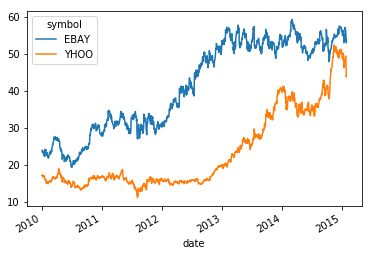

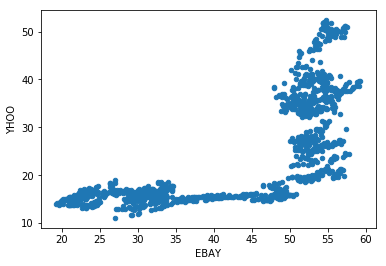

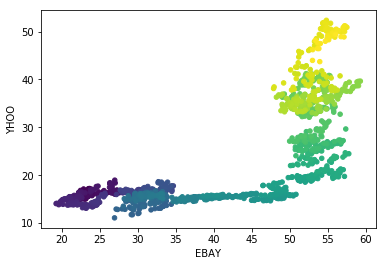

In [3]:
#' @step
# Plot the raw values over time
fig, ax = plt.subplots()
prices.plot()
plt.show()


#' @step
# Scatterplot with one company per axis
fig, ax = plt.subplots()
prices.plot.scatter('EBAY', 'YHOO')
plt.show()


#' @step
# Scatterplot with color relating to time
fig, ax = plt.subplots()
prices.plot.scatter('EBAY', 'YHOO', c=prices.index, cmap=plt.cm.viridis, colorbar=False)
plt.show()

## Sample

# Fitting a simple regression model

## Description

Now that we've got datapoints for each time point, let's use the data from several companies to
predict the value of a test company. We'll attempt to predict the value of the Apple stock price
using the values of a few other prominent tech companies.

## Pre code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('https://assets.datacamp.com/production/repositories/1536/datasets/43d325fa67cde1d4d5de62adc108fceabaddf3cc/prices.csv')
USE_VALUE = 'close'
train_symbols = ['EBAY', 'NVDA', 'YHOO']
target_symbol = 'AAPL'
data = data.pivot(index='date', columns='symbol', values=USE_VALUE)
data.index = pd.to_datetime(data.index)
data = data.loc[:"2015-01"]
prices = data[train_symbols]
target = data[target_symbol]


## Instructions

- The input data has been loaded into a DataFrame called `prices`. The target data has been loaded into a DataFrame called `target`.
- Create a regression model object with scikit-learn.
- Use the data to train and score the model with cross-validation.

## Hints

- The syntax for fitting the regression model is similar to the syntax for a classifier.


## Solution

In [2]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Create our training arrays
X = prices.values
y = target.values

# Fit and score the model with cross-validation
scores = cross_val_score(Ridge(), X, y, cv=3)

## Sample

# Visualizing predicted values

## Description

When dealing with timeseries data, it's useful to visualize predictions on top of the "actual"
values that are used to test the model. In this exercise we'll use the model from before, and
try to visualize the performance of our model.

## Pre code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('https://assets.datacamp.com/production/repositories/1536/datasets/43d325fa67cde1d4d5de62adc108fceabaddf3cc/prices.csv')
USE_VALUE = 'close'
train_symbols = ['EBAY', 'NVDA', 'YHOO']
target_symbol = 'AAPL'
data = data.pivot(index='date', columns='symbol', values=USE_VALUE)
data.index = pd.to_datetime(data.index)
data = data.loc[:"2013-01"]
X = data[train_symbols].values
y = data[target_symbol].values

from sklearn.linear_model import Ridge

## Instructions

- The input and target data have been preloaded into the variables `X` and `y`.
  
  Split the data into training and test sets.
  
  Use the training data to train the regression model. Then use the testing data to generate predictions for the model.

- Finally, plot a timeseries of the predicted and "actual" values of the testing data.


## Hints

- You should be splitting up the variables `X` and `y` into train/test sets, then using the split data to fit the model.

- The `r2_score` function takes testing data and predicted data as inputs

## Solution

/home/choldgraf/anaconda/envs/dev/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


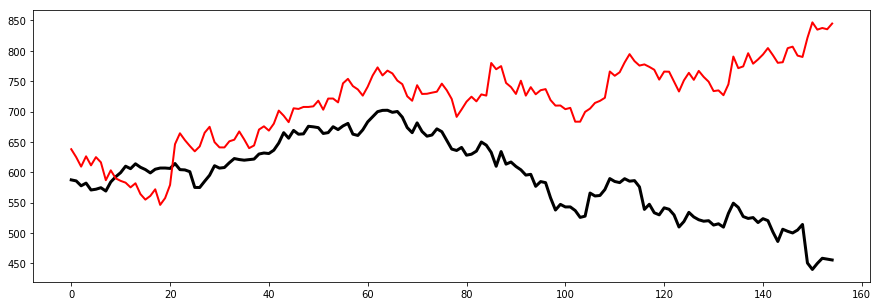

In [2]:
#' @step
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, shuffle=False)

# Fit our model and generate predictions
model = Ridge().fit(X_train, y_train)
predictions = model.predict(X_test)


#' @step
# Visualize our predictions along with the "true" values, and print the score
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(y_test, color='k', lw=3)
ax.plot(predictions, color='r', lw=2)
score = r2_score(y_test, predictions)
plt.show()

## Sample

# Advanced timeseries prediction
## VIDEO

# Visualizing messy data

## Description

Let's take a look at a new dataset - this one is a bit less-clean than what we've seen before.
As always, we'll first start by visualizing the raw data. We'll plot several timeseries. Take
a close look and try to find datapoints that could be problematic for fitting models.

## Pre code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('https://assets.datacamp.com/production/repositories/1536/datasets/43d325fa67cde1d4d5de62adc108fceabaddf3cc/prices.csv')
USE_VALUE = 'close'
train_symbols = ['EBAY', 'NVDA', 'YHOO']
target_symbol = 'AAPL'
data = data.pivot(index='date', columns='symbol', values=USE_VALUE)
data.index = pd.to_datetime(data.index)

prices = data[train_symbols]
target = data[target_symbol]

prices.loc["2011":"2012", "NVDA"] = np.nan
prices.loc["2011-05":"2012-03", "YHOO"] = np.nan
prices.loc["2013-01":"2014-01", "EBAY"] = np.nan

/home/choldgraf/anaconda/envs/dev/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/choldgraf/anaconda/envs/dev/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/choldgraf/anaconda/envs/dev/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/h

## Instructions

* The data has been loaded into a DataFrame called `prices`.
* Visualize the timeseries data using Pandas.
* Count the number of missing values in each timeseries.
* Note any irregularities that you can see. What do you think they are?

## Hints

* To count the number of missing values, we should first determine which values are `NaN`s, then count each one per column

## Solution

symbol
EBAY    273
NVDA    502
YHOO    232
dtype: int64


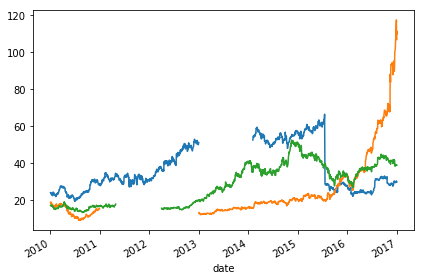

In [2]:
# Visualize the dataset
prices.plot(legend=False)

# Count the missing values of each timeseries
missing_values = prices.isna().sum()
plt.tight_layout()
plt.show()

## Sample

# Imputing missing values

## Description

You may have noticed that some of our timeseries are missing values over time. If we have a missing datapoint, what
should we use to fill it in? In this exercise we'll practice using different kinds of interpolation to fill in some missing values,
visualizing the result each time.

## Pre code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('https://assets.datacamp.com/production/repositories/1536/datasets/43d325fa67cde1d4d5de62adc108fceabaddf3cc/prices.csv')
USE_VALUE = 'close'
train_symbols = ['EBAY', 'NVDA', 'YHOO']
target_symbol = 'AAPL'
data = data.pivot(index='date', columns='symbol', values=USE_VALUE)
data.index = pd.to_datetime(data.index)

prices = data[train_symbols]

prices.loc["2011":"2012", "NVDA"] = np.nan
prices.loc["2011-05":"2012-03", "YHOO"] = np.nan
prices.loc["2013-01":"2014-01", "EBAY"] = np.nan
prices = prices.loc[:"2015-01"]

/home/choldgraf/anaconda/envs/dev/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/choldgraf/anaconda/envs/dev/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/home/choldgraf/anaconda/envs/dev/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/choldgraf/anaconda/

## Instructions

- A single timeseries has been loaded into a DataFrame called `prices`.
  
  Define a function that we'll use to interpolate missing datapoints and plot them.
  
- Interpolate using the latest non-nan value and plot the results
- Interpolate linearly and plot the results
- Interpolate with a quadratic function and plot the results


## Hints

- We'll use the `isna` method to create a mask that marks missing values, and the `interpolation` method of the DataFrame to interpolate
- Interpolation using the latest non-nan value is labelled `zero` in Pandas
- Linear interpolation is labelled `linear` in Pandas
- Linear Interpolation is labelled `quadratic` in Pandas

## Solution

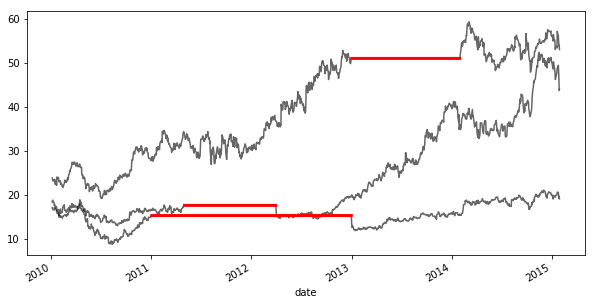

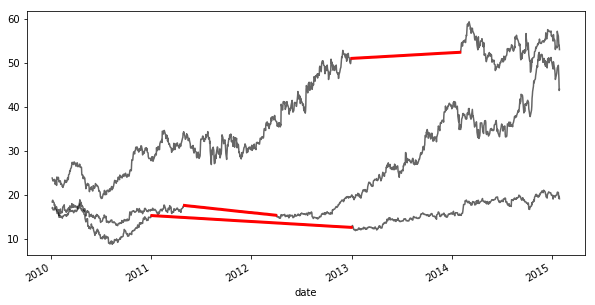

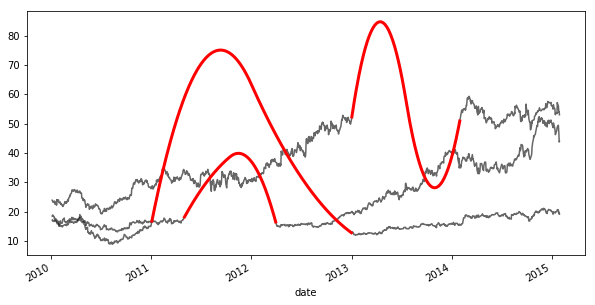

In [4]:
#' @step
# Create a function we'll use to interpolate and plot
def interpolate_and_plot(prices, interpolation):
    # Create a boolean mask for our missing values
    missing_values = prices.isna()

    # Interpolate the missing values for this type of interpolation
    prices_interp = prices.interpolate(interpolation)

    # Plot the results, highlighting the interpolated values in red
    fig, ax = plt.subplots(figsize=(10, 5))
    prices_interp.plot(color='k', alpha=.6, ax=ax, legend=False)
    
    # Now plot the interpolated values on top in red
    prices_interp[missing_values].plot(ax=ax, color='r', lw=3, legend=False)
    plt.show()

#' @step
# Interpolate using the latest value
interpolate_and_plot(prices, 'zero')

#' @step
# Interpolate linearly
interpolate_and_plot(prices, 'linear')

#' @step
# Interpolate with a quadratic function
interpolate_and_plot(prices, 'quadratic')

## Sample

# Handling outliers

## Description
In this example, we'll practice how to handle outliers - datapoints that are so different from the rest of your data, that you
treat them _differently_ than you'd treat a more "normal-looking" datapoint. We'll convert our dataset so that it's comprised of
features that make it easier to spot and fix outliers first.

## Pre code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('https://assets.datacamp.com/production/repositories/1536/datasets/43d325fa67cde1d4d5de62adc108fceabaddf3cc/prices.csv')
USE_VALUE = 'close'
train_symbols = ['EBAY', 'NVDA', 'YHOO']
target_symbol = 'AAPL'
data = data.pivot(index='date', columns='symbol', values=USE_VALUE)
data.index = pd.to_datetime(data.index)

prices = data[train_symbols + [target_symbol]]
prices = prices.loc[:"2015-01"]
prices.loc["2011":"2012", "NVDA"] = np.nan
prices.loc["2011-05":"2012-03", "YHOO"] = np.nan
prices.loc["2013-01":"2014-01", "EBAY"] = np.nan
prices = prices.loc[:"2015-01"]
prices = prices.interpolate('linear')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge

## Instructions

- Write a function that converts each timepoint's value to the percent change from the mean value in the window just before.

- Write a function that replaces outlier datapoints with the median value from the entire timeseries.

## Hints

- For each window, calculate the mean of all timepoints but the last one, calculate the % difference of the final timepoint from this mean.
- You must calculate the absolute value of each timepoint to determine if it exceeds 3 standard deviations.

## Solution A

/home/choldgraf/anaconda/envs/dev/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  if sys.path[0] == '':


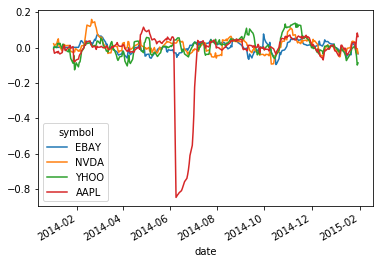

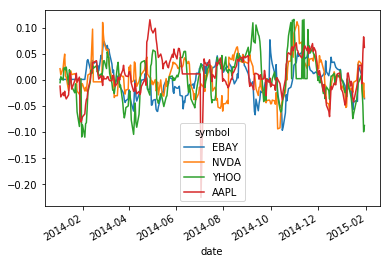

In [2]:
#' @step
def percent_change(series):
    """Calculate the percent change of the last datapoint from the mean of previous datapoints."""
    # Collect all but the last value of this window
    previous_values = series[:-1]
    
    # Calculate the % difference between the last value and the mean of earlier values
    percent_change = (series[-1] - np.mean(previous_values)) / np.mean(previous_values)
    return percent_change

# Apply our preprocessing function and plot
prices_perc = prices.rolling(20).apply(percent_change)
prices_perc.loc["2014":"2015"].plot()
plt.show()


#' @step
def replace_outliers(series):
    """Replace any datapoint greater than 3 standard deviations from the mean with the mean value of all datapoints."""
    # Calculate a mask for values that are > 3 standard deviations from the mean
    this_mask = np.abs(series) > (np.std(series) * 3)
    
    # Replace these values with the median accross the data
    series[this_mask] = np.nanmedian(series)
    return series

# Apply our preprocessing function and plot
prices_perc = prices_perc.apply(replace_outliers)
prices_perc.loc["2014":"2015"].plot()
plt.show()

## Sample

# Creating time-shifted features

## Description

Next we'll create a different kind of feature from the ones we've used before - we'll shift our raw data in time. This is a common practice in order to investigate whether previous values of the same timeseries are useful in predicting subsequent values.


## Pre code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('https://assets.datacamp.com/production/repositories/1536/datasets/43d325fa67cde1d4d5de62adc108fceabaddf3cc/prices.csv')
USE_VALUE = 'close'
train_symbols = ['EBAY', 'NVDA', 'YHOO']
target_symbol = 'AAPL'
data = data.pivot(index='date', columns='symbol', values=USE_VALUE)
data.index = pd.to_datetime(data.index)

prices = data[train_symbols + [target_symbol]]

def percent_change(series):
    previous_values = series[:-1]
    return (series[-1] - np.mean(previous_values)) / np.mean(previous_values)

def replace_outliers(series):
    threshold = series.std() * 3
    this_mask = np.abs(series) > threshold
    series[this_mask] = np.mean(series)
    return series

prices_perc = prices.rolling(20).apply(percent_change)
prices_perc = prices_perc.apply(replace_outliers)
prices_perc = prices_perc['EBAY']

/home/choldgraf/anaconda/envs/dev/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning


## Instructions

- Create multiple, time-shifted versions of our timeseries and collect them into a list.
- Concatenate them all into a DataFrame and visualize the result

## Hints

- You can use the `shift` method of DataFrames to shift the timeseries by `day_shift` indices each iteration
- You should concatenate so that the output is shape `n_times, n_shifts`

## Solution

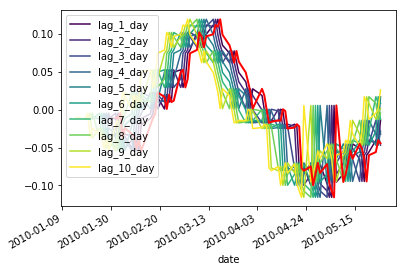

In [3]:
#' @step
# These are the "time lags" we'll shift the data by on each iteration
shifts = np.arange(-1, -11, -1)

prices_perc_shifted = []
for day_shift in shifts:
    # Shift our prices data
    this_shift = prices_perc.shift(day_shift)
    
    #Give it a new name and append to the list
    this_shift.name = "lag_{}_day".format(np.abs(day_shift))
    prices_perc_shifted.append(this_shift)
    
    
#' @step
# Concatenate all of our shifted data into a single dataframe
prices_perc_shifted =  pd.concat(prices_perc_shifted, axis=1)

# Plot the first 100 samples of each
prices_perc_shifted.iloc[:100].plot(cmap=plt.cm.viridis)
prices_perc.iloc[:100].plot(color='r', lw=2)
plt.show()

## Sample

# Creating features over time
## VIDEO

# Special case: Auto-regressive models

## Description

Now that we've created time-shifted versions of a single timeseries, we can fit an _auto-regressive_ model. This is a regression
model where the input features are time-shifted versions of the output timeseries data. By investigating the coefficients of this
model, we can explore any repetitive patterns that exist in the data, and get an idea for how far in the past a datapoint is predictive
of the future.

## Pre code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('https://assets.datacamp.com/production/repositories/1536/datasets/43d325fa67cde1d4d5de62adc108fceabaddf3cc/prices.csv')
USE_VALUE = 'close'
train_symbols = ['EBAY', 'NVDA', 'YHOO']
target_symbol = 'AAPL'
data = data.pivot(index='date', columns='symbol', values=USE_VALUE)
data.index = pd.to_datetime(data.index)

prices = data[train_symbols + [target_symbol]]

def percent_change(series):
    previous_values = series[:-1]
    return (series[-1] - np.mean(previous_values)) / np.mean(previous_values)

def replace_outliers(series):
    threshold = series.std() * 3
    this_mask = np.abs(series) > threshold
    series[this_mask] = np.mean(series)
    return series

prices_perc = prices.rolling(20).apply(percent_change)
prices_perc = prices_perc.apply(replace_outliers)
prices_perc = prices_perc['EBAY']

prices_perc_shifted = pd.DataFrame(index=prices_perc.index)
shifts = np.arange(-1, -11, -1)
for day_shift in shifts:
    this_label = "lag_{}_day".format(np.abs(day_shift))
    prices_perc_shifted[this_label] = prices_perc.shift(day_shift)
    
from sklearn.linear_model import Ridge

/home/choldgraf/anaconda/envs/dev/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning


## Instructions

- Replace missing values of our shifted timeseries with the median value.
- Fit a regression model that uses the time-shifted timeseries to predict our original (non-shifted) timeseries
- Visualize the coefficients of the model to see the relationship between each lag and the original timeseries

## Hints

- Use the `fillna` method to replace `nan` values with the median. Make sure you use NumPy's `nanmedian` function which gracefully deals with missing values.

## Solution

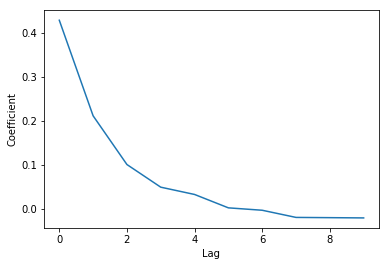

In [2]:
# Replace missing values with the median for each column
X = prices_perc_shifted.fillna(np.nanmedian(prices_perc_shifted))
y = prices_perc.fillna(np.nanmedian(prices_perc))

# Fit the model with our input/output data
model = Ridge()
model.fit(X.values, y.values)

# Plot the model's coefficients
fig, ax = plt.subplots()
ax.plot(model.coef_)
ax.set(xlabel="Lag", ylabel="Coefficient")
plt.show()

## Sample

# Engineering more complex features

## Description

Now that we've practiced some simple feature engineering, we'll move on to something more complex. We'll calculate
a collection of features of our timeseries data and visualize what they look like over time. This process resembles how
many timeseries models operate.

## Pre code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('https://assets.datacamp.com/production/repositories/1536/datasets/43d325fa67cde1d4d5de62adc108fceabaddf3cc/prices.csv')
USE_VALUE = 'close'
train_symbols = ['EBAY', 'NVDA', 'YHOO']
target_symbol = 'AAPL'
data = data.pivot(index='date', columns='symbol', values=USE_VALUE)
data.index = pd.to_datetime(data.index)

prices = data[train_symbols + [target_symbol]]

def percent_change(series):
    previous_values = series[:-1]
    return (series[-1] - np.mean(previous_values)) / np.mean(previous_values)

def replace_outliers(series):
    threshold = series.std() * 3
    this_mask = np.abs(series) > threshold
    series[this_mask] = np.mean(series)
    return series

prices_perc = prices.rolling(20).apply(percent_change)
prices_perc = prices_perc.apply(replace_outliers)
prices_perc = prices_perc['EBAY']


/home/choldgraf/anaconda/envs/dev/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning


## Instructions

- Using a rolling window, calculate four rolling features of the timeseries: the minimum, maximum, mean, and standard deviation
- Plot the results over time, along with the original timeseries

## Hints

- The numpy functions we'll use for the `aggregate` are `min`, `max`, `mean`, and `std`

## Solution

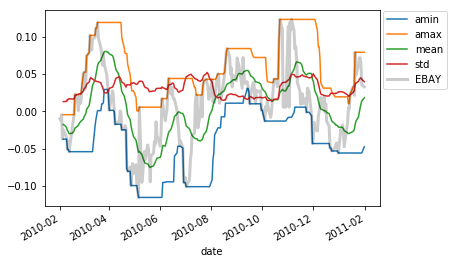

In [5]:
# Define a rolling window with Pandas, excluding the right-most datapoint of the window
prices_perc_rolling = prices_perc.rolling(20, min_periods=5, closed='right')

# Define the features we'll calculate for each window
features_to_calculate = [np.min, np.max, np.mean, np.std]

# Calculate these features for our rolling window object
features = prices_perc_rolling.aggregate(features_to_calculate)

# Plot the results
ax = features.loc[:"2011-01"].plot()
prices_perc.loc[:"2011-01"].plot(ax=ax, color='k', alpha=.2, lw=3)
ax.legend(loc=(1.01, .6))
plt.show()

## Sample

# Percentiles and partial functions

## Description

Many functions take multiple arguments as inputs, while we're only interest in one of them. In this example we'll
practice how to pre-choose arguments of a function so that you can pre-configure how it runs. We'll use this to calculate
several percentiles of our data using the same `percentile` function in `tsfresh`.

## Pre code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('https://assets.datacamp.com/production/repositories/1536/datasets/43d325fa67cde1d4d5de62adc108fceabaddf3cc/prices.csv')
USE_VALUE = 'close'
train_symbols = ['EBAY', 'NVDA', 'YHOO']
target_symbol = 'AAPL'
data = data.pivot(index='date', columns='symbol', values=USE_VALUE)
data.index = pd.to_datetime(data.index)

prices = data[train_symbols + [target_symbol]]

def percent_change(series):
    previous_values = series[:-1]
    return (series[-1] - np.mean(previous_values)) / np.mean(previous_values)

def replace_outliers(series):
    threshold = series.std() * 3
    this_mask = np.abs(series) > threshold
    series[this_mask] = np.mean(series)
    return series

prices_perc = prices.rolling(20).apply(percent_change)
prices_perc = prices_perc.apply(replace_outliers)
prices_perc = prices_perc['EBAY']

# Just to speed up code execution time
from tsfresh.feature_extraction import feature_calculators


/home/choldgraf/anaconda/envs/dev/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning


## Instructions

- Use the `partial` Python function to create several feature generators that calculate quantiles of our data. Collect these into a list.

- Aggregate the dataset and calculate the quantiles of each window, then plot the results.

## Hints

- The `partial` function takes a function as a first input, and a subset of its arguments next. It then returns _another_ function that you can call with the _other_ subset of arguments

- Use the `aggregate` method along with the list of functions you've calculated in order to compute the quantiles over time.

## Solution

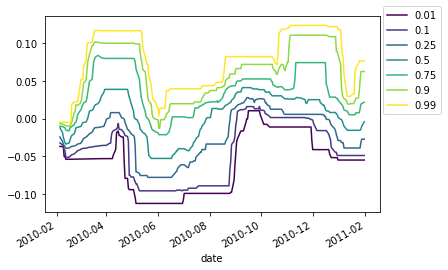

In [2]:
#' @step
from tsfresh.feature_extraction import feature_calculators
from functools import partial

# Define the quantiles we'd like to calculate
quantiles = [.01, .1, .25, .5, .75, .9, .99]

# Use a list comprehension to create a partial function for each quantile
quantile_functions = [partial(feature_calculators.quantile, q=quantile)
                      for quantile in quantiles]


#' @step
# Calculate each of these quantiles on the data using a rolling window
prices_perc_rolling = prices_perc.rolling(40, min_periods=5, closed='right')
features_quantiles = prices_perc_rolling.aggregate(quantile_functions)

# Plot a subset of the result
ax = features_quantiles.loc[:"2011-01"].plot(cmap=plt.cm.viridis)
ax.legend(quantiles, loc=(1.01, .5))
plt.show()

## Sample

# Advanced feature engineering with `tsfresh`

## Description

In this example we'll calculate some more complicated features of our timeseries data
using `tsfresh`. We'll incorporate this into a "extract, fit, predict" pipeline to see how
our model does. Note that this is a very small subset of all the features you can calculate
with `tsfresh`.

## Pre code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('https://assets.datacamp.com/production/repositories/1536/datasets/43d325fa67cde1d4d5de62adc108fceabaddf3cc/prices.csv')
USE_VALUE = 'close'
train_symbols = ['EBAY', 'NVDA', 'YHOO']
target_symbol = 'AAPL'
data = data.pivot(index='date', columns='symbol', values=USE_VALUE)
data.index = pd.to_datetime(data.index)

prices = data[train_symbols + [target_symbol]]

def percent_change(series):
    previous_values = series[:-1]
    return (series[-1] - np.mean(previous_values)) / np.mean(previous_values)

def replace_outliers(series):
    threshold = series.std() * 3
    this_mask = np.abs(series) > threshold
    series[this_mask] = np.mean(series)
    return series

prices_perc = prices.rolling(20).apply(percent_change)
prices_perc = prices_perc.apply(replace_outliers)

# Pull out training and test
prices_test = prices_perc[target_symbol]
prices_perc = prices_perc[train_symbols]

from tsfresh.feature_extraction import feature_calculators
from functools import partial
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

prices_perc_rolling = prices_perc.rolling(40, min_periods=5, closed='right')


# Define the quantiles we'd like to calculate
quantiles = [.01, .1, .25, .5, .75, .9, .99]

# Use a list comprehension to create a partial function for each quantile
quantile_functions = [partial(feature_calculators.quantile, q=quantile)
                      for quantile in quantiles]
features_quantiles = prices_perc_rolling.aggregate(quantile_functions)
new_columns = [(comp, quant) for comp in train_symbols for quant in quantiles]
features_quantiles.columns = pd.MultiIndex.from_tuples(new_columns, names=['company', 'feature'])

/home/choldgraf/anaconda/envs/dev/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning


## Instructions

- Using `tsfresh`, compute several more timeseries features from our data - specifically, the "absolute energy", "count above the meant", and "count below the mean". Concatenate them with the quantiles that we calculated before.

- Replace any missing values with the median for each feature. Then, split the data into training/test sets, fit a regression model, and generate predictions on held-out data.

- Visualize the coefficients of the fit model to see which features had more or less impact on the output data.

## Hints

- The `tsfresh` feature functions you'll use are called `abs_energy`, `count_above_mean`, and `count_below_mean`

- Use the `fillna` and `nanmedian` functions to replace missing values with the correct median for each feature.

- The coefficients after a model is fit are stored in an attribute called `coef_` for the `Ridge` model.

## Solution

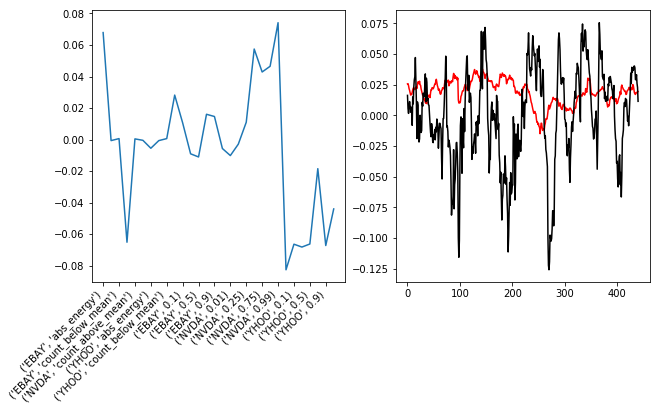

In [2]:
#' @step
# Define the features we'll calculate on our data
feature_functions = [feature_calculators.abs_energy,
                     feature_calculators.count_above_mean,
                     feature_calculators.count_below_mean]

# Calculate them on our rolling window
features = prices_perc_rolling.aggregate(feature_functions)

# Concatenate our quantiles features from before
features = pd.concat([features, features_quantiles], axis=1)


#' @step
# Fill in any missing values with the median
X = features.fillna(np.nanmedian(features)).values
y = prices_test.fillna(np.nanmedian(prices_test)).values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)

# Fit the model on the training set and generate predictions on the test set
model = Ridge().fit(X_train, y_train)
y_pred = model.predict(X_test)


#' @step
# Extract the model coefficients into a new variable
coefs = model.coef_

# Visualize the model coefficients
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(coefs)
axs[0].set_xticks(np.arange(len(coefs))[::2])
axs[0].set_xticklabels(features.columns.values[::2], rotation=45, horizontalalignment='right')

# Visualize the predicted and true values
axs[1].plot(y_pred, color='r')
axs[1].plot(y_test, color='k')
plt.show()

## Sample